**The following notebook is to describe the results from the test due to Case 1 with 3 years for calibration.**

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.gridspec as gridspec
import sys
import os

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
directory_name = 'test.demo'

In [18]:
output_data = pd.read_csv('test.demo/observations.dat',skiprows=88,sep=' ')
output_data.head()

,time [s],point -0.04 temperature [K],point -0.1 temperature [K],point -0.2 temperature [K],point -0.4 temperature [K],point -0.8 temperature [K],point -1.2 temperature [K],point -1.6 temperature [K],point -0.04 saturation liquid,point -0.1 saturation liquid,point -0.2 saturation liquid,point -0.4 saturation liquid,point -0.8 saturation liquid,point -1.2 saturation liquid,point -1.6 saturation liquid
0,0.0,270.150000,270.150000,270.150000,270.150000,270.150000,270.150000,270.150000,0.164877,0.164877,0.164877,0.165884,0.165884,0.165884,0.165884
1,86400.0,262.225123,264.658109,266.537037,268.156417,269.820655,270.110357,270.143703,0.164591,0.164627,0.164671,0.165874,0.165881,0.165884,0.165884
2,172800.0,261.467070,263.410857,265.072842,266.782706,269.207512,269.938185,270.093117,0.164583,0.164607,0.164635,0.165871,0.165878,0.165882,0.165883
3,259200.0,261.033324,262.708034,264.201708,265.861550,268.615765,269.694688,269.998820,0.164578,0.164597,0.164619,0.165869,0.165875,0.165881,0.165883
4,345600.0,260.484695,262.081382,263.512743,265.147769,268.079063,269.414064,269.867179,0.164573,0.164589,0.164608,0.165868,0.165874,0.165879,0.165882


In [15]:
measured_data = pd.read_csv('/home/rk/ats_rk/testing/ats-demos/rk_model/Data/Data_Yakou/Yakou_met_data_ITP_rk/Final_OutputData_4yrs/Calib_outputdata_2016_2018.csv',sep='\t', index_col='TIMESTAMP')
measured_data.head()

,Soil moisture at - 0.04 m (%),Soil moisture at - 0.1 m (%),Soil moisture at - 0.2 m (%),Soil moisture at - 0.4 m (%),Soil moisture at - 0.8 m (%),Soil moisture at - 1.2 m (%),Soil moisture at - 1.6 m (%),Soil temperature at - 0.00 m (°C),Soil temperature at - 0.04 m (°C),Soil temperature at - 0.1 m (°C),Soil temperature at - 0.2 m (°C),Soil temperature at - 0.4 m (°C),Soil temperature at - 0.8 m (°C),Soil temperature at - 1.2 m (°C),Soil temperature at - 1.6 m (°C)
TIMESTAMP,,,,,,,,,,,,,,,
2016-01-01,7.897694,7.523868,8.694236,9.016111,5.368792,4.093549,6.058042,-13.103958,-12.507847,-11.848819,-11.295486,-9.824722,-7.814958,-4.874889,-3.447965
2016-01-02,7.991826,7.594250,8.745417,9.012639,5.350889,4.060958,6.008417,-12.255417,-11.861597,-11.342569,-10.947708,-9.781389,-7.936854,-5.063889,-3.639549
2016-01-03,7.992500,7.606875,8.766806,9.033472,5.342833,4.033590,5.962187,-12.737500,-11.824514,-11.200694,-10.765278,-9.618403,-7.946111,-5.228028,-3.817500
2016-01-04,7.960069,7.581465,8.749236,9.025833,5.336757,4.012583,5.923819,-13.006597,-11.997847,-11.365486,-10.867778,-9.648889,-7.977951,-5.358771,-3.977958
2016-01-05,7.913792,7.539000,8.703056,8.995694,5.324597,3.993715,5.892174,-13.525278,-12.371597,-11.691181,-11.171181,-9.829653,-8.078194,-5.476889,-4.119438


In [22]:
output_data = output_data.iloc[1:] # Dropping the first row as we need to match the indices
output_data.index = measured_data.index

In [25]:
len(np.arange(0,1096,1))

1096

Text(0, 0.5, 'Temperature (K)')

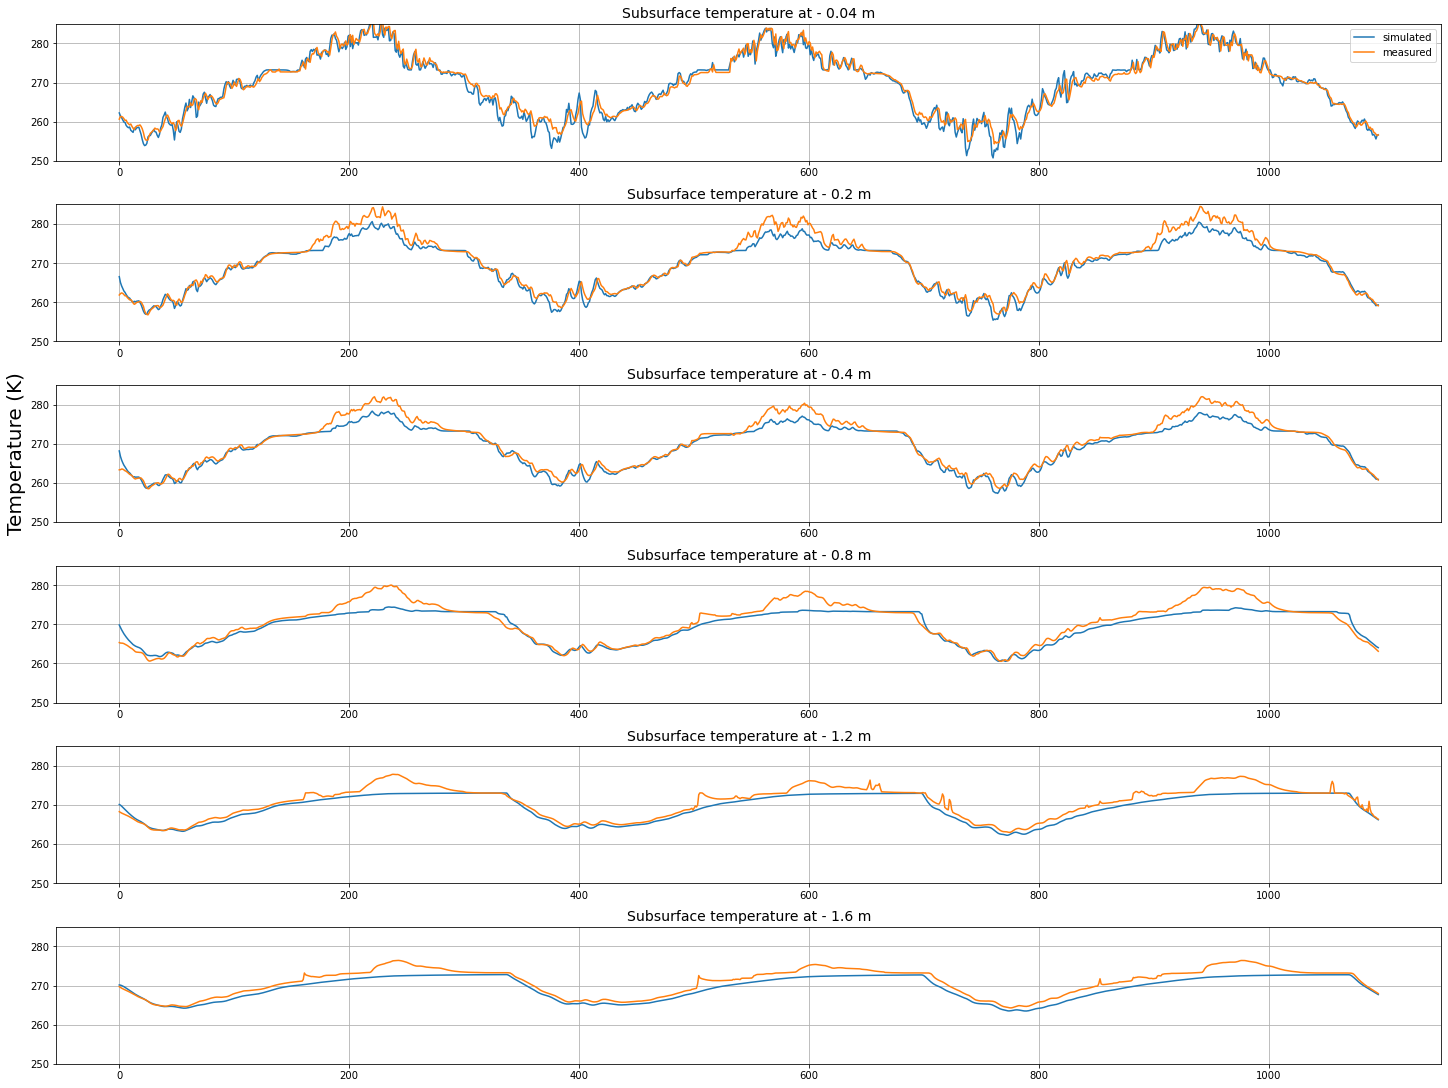

In [38]:
### Plotting the temperature 
fig2 = plt.figure(figsize=(20,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, height_ratios=[1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

plt.title('Plotting soil temperature at different depths [K]')


depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

for j, depth in enumerate(depths):
        locals()['f2_ax'+str(j+1)].plot(np.arange(0,1096,1), output_data[f'point -{depth} temperature [K]'].values, label='simulated')
        locals()['f2_ax'+str(j+1)].plot(np.arange(0,1096,1), measured_data[f'Soil temperature at - {depth} m (°C)'].values+273.15, label='measured')
        locals()['f2_ax'+str(j+1)]
        locals()['f2_ax'+str(j+1)].set_title(f'Subsurface temperature at - {depth} m', fontsize=14)
        f2_ax1.legend()
        locals()['f2_ax'+str(j+1)].grid(True)
        locals()['f2_ax'+str(j+1)].set_ylim(250,285)
    

f2_ax3.set_ylabel('Temperature (K)', fontsize=20)
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#plt.xlabel('Date (days)')
#plt.legend()
#plt.grid(True)

In [33]:
# Converting the simulated data to soil moisture (%)
porosity_peat = 0.80038117555001
porosity_mineral = 0.50705336935386


output_data['Soil moisture at - 0.04 m (%)'] = output_data['point -0.04 saturation liquid']*porosity_peat*100
output_data['Soil moisture at - 0.2 m (%)'] = output_data['point -0.2 saturation liquid']*porosity_peat*100
output_data['Soil moisture at - 0.4 m (%)'] = output_data['point -0.4 saturation liquid']*porosity_mineral*100
output_data['Soil moisture at - 0.8 m (%)'] = output_data['point -0.8 saturation liquid']*porosity_mineral*100

output_data['Soil moisture at - 1.2 m (%)'] = output_data['point -1.2 saturation liquid']*porosity_mineral*100
output_data['Soil moisture at - 1.6 m (%)'] = output_data['point -1.6 saturation liquid']*porosity_mineral*100

Text(0, 0.5, 'Temperature (K)')

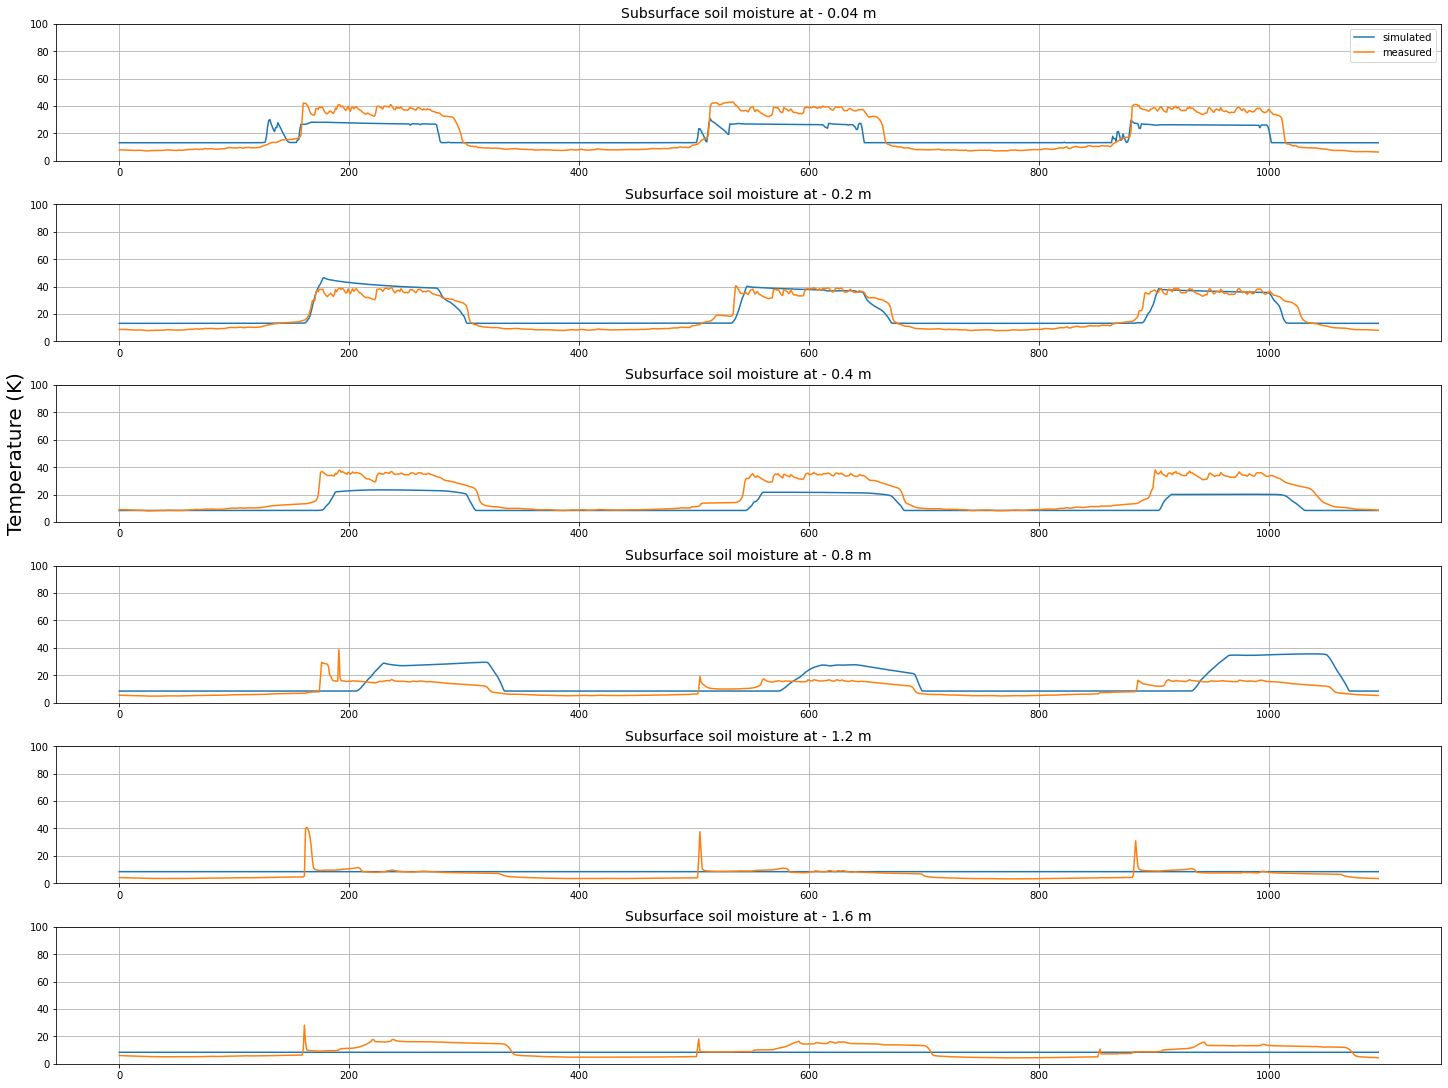

In [36]:
### Plotting the saturation of liquid
fig2 = plt.figure(figsize=(20,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, height_ratios=[1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

plt.title('Plotting soil moisture at different depths [K]')


depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

for j, depth in enumerate(depths):
        locals()['f2_ax'+str(j+1)].plot(np.arange(0,1096,1), output_data[f'Soil moisture at - {depth} m (%)'].values, label='simulated')
        locals()['f2_ax'+str(j+1)].plot(np.arange(0,1096,1), measured_data[f'Soil moisture at - {depth} m (%)'].values, label='measured')
        locals()['f2_ax'+str(j+1)]
        locals()['f2_ax'+str(j+1)].set_title(f'Subsurface soil moisture at - {depth} m', fontsize=14)
        f2_ax1.legend()
        locals()['f2_ax'+str(j+1)].grid(True)
        locals()['f2_ax'+str(j+1)].set_ylim(0,100)
    

f2_ax3.set_ylabel('Temperature (K)', fontsize=20)
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#plt.xlabel('Date (days)')
#plt.legend()
#plt.grid(True)